In [1]:
%load_ext autoreload
%autoreload 2

# Get parent root directory and add to sys.path
import sys, os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
#from rocket_euler import Rocket
from src.rocket import Rocket
from src.pos_rocket_vis import *
from LandMPC_template.nmpc_land import NmpcCtrl
import numpy as np

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir,"rocket.yaml")

# Rocket setup
Ts  = 1/20
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
rocket.mass = 1.7 # Do not change!!!

# Visualization setup
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1

In [3]:
sim_time = 10 # simulation length in seconds
x0 = np.array([0, 0, 0, np.deg2rad(30), 0, 0, 0, 0, 0, 3.0, 2.0, 10.0]) # w, phi, v, p
x_ref = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 3.0])
xs, us = rocket.trim(x_ref)
print("Linearization around a steady state:")
print("x_ref = ", x_ref)
print("xs = ", xs)
print("us = ", us)


H = 1.5 # horizon time (teste avec 3 pour l'experience)
nmpc = NmpcCtrl(rocket, H, xs, us, Ts)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Linearization around a steady state:
x_ref =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
xs =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
us =  [ 0.          0.         56.66666667  0.        ]


In [4]:
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol = rocket.simulate_land(nmpc, sim_time, H, x0)

Simulating time 0.00
      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  |   2.86ms ( 62.20us)   3.40ms ( 73.96us)        46
       nlp_g  |   7.35ms (156.47us)   9.28ms (197.48us)        47
  nlp_grad_f  |   1.86ms (109.29us)   1.95ms (114.85us)        17
  nlp_hess_l  |  66.97ms (  4.46ms)  75.41ms (  5.03ms)        15
   nlp_jac_g  |  23.92ms (  1.41ms)  27.15ms (  1.60ms)        17
       total  | 230.02ms (230.02ms) 285.12ms (285.12ms)         1
      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  | 710.00us ( 64.55us) 741.72us ( 67.43us)        11
       nlp_g  |   1.79ms (162.82us)   2.09ms (189.69us)        11
  nlp_grad_f  |   1.28ms (115.91us)   1.23ms (111.51us)        11
  nlp_hess_l  |  45.52ms (  5.06ms)  58.11ms (  6.46ms)         9
   nlp_jac_g  |  18.24ms (  1.66ms)  23.71ms (  2.16ms)        11
       total  | 141.20ms (141.20ms) 166.07ms (166.07ms)         1
      solver  :   t_proc      (avg)   t_wall      (avg)

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=199, step=2), IntSlider(value=0…

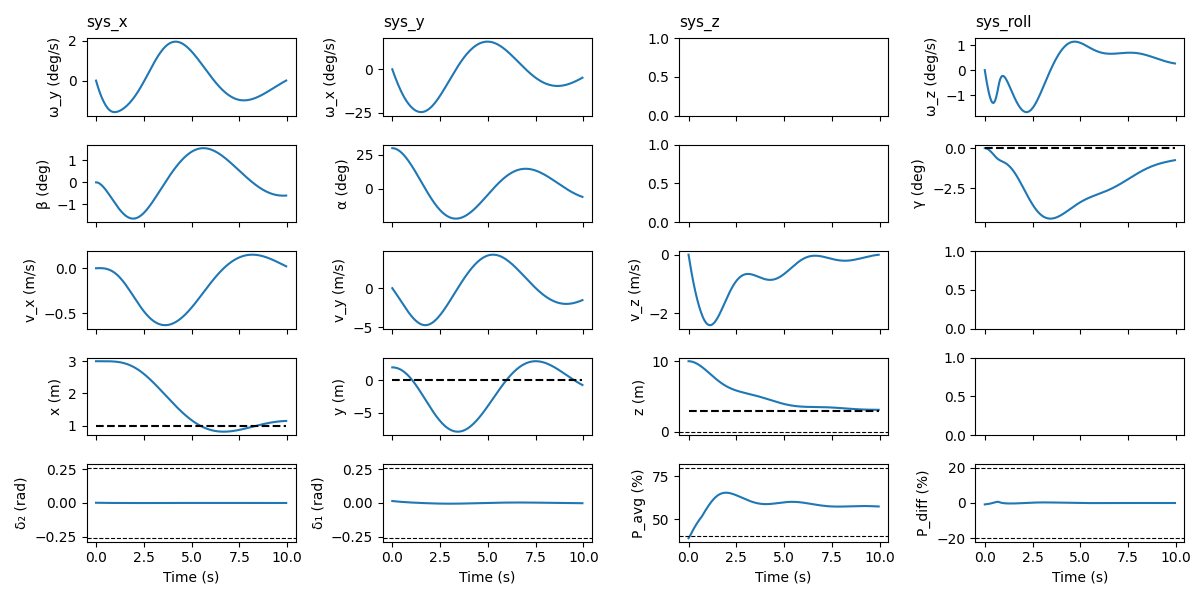

In [5]:
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs)